<a href="https://colab.research.google.com/github/Tahimi/numericalMethods/blob/main/solvingSystemOfODEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import inspect
def rungeKuttaAlgForOneODE(problem):
  # naming this solver
  algName = inspect.stack()[0][3]

  # Reading the problem's data
  probName = problem['name']
  f = problem['f']
  x0 = problem['x0']
  xn = problem['xn']
  y0 = problem['y0']
  #fa = problem['fa']
  h = problem['h']
  #yip1 = problem['yip1']

  # Variables Initialization
  i = 0
  x = x0
  y = y0
  #print('i = ', i, ', x = %.2f' % x, ', y = %.4f' % y)

  # Variables Saving
  X = [x]
  Y = [y]

  n = int((xn - x0)/h) # (1-0)/0.2=5
  for i in range(1, n + 1): # i=1,2,3,4,5
    # Variables Updating
    k1 = h*f(x, y)
    k2 = h*f(x + h/2., y + k1/2.)
    k3 = h*f(x + h/2., y + k2/2.)
    k4 = h*f(x + h, y + k3)
    y += (k1 + 2*k2 + 2*k3 + k4)/6.
    x += h
    #print('i = ', i, ', x = %.2f' % x, ', y = %.4f' % y)

    # Variables Saving
    X += [x]
    Y += [y]

  print(algName, 'is done solving', probName)
  return X, Y

In [ ]:
import math

problem3 = {'name':'problem3',
            'f': lambda x, y: -20*y + 20*x**2 + 2*x,
            'x0': 0,
            'xn': 1,
            'y0': 1,
            'fa': lambda x: math.exp(-20*x) + x**2,
            'h': 0.1,
            'yip1': lambda x, y, h: (y + h*(20*(x + h)**2 + 2*(x + h)))/(1 + 20*h)}

problem1 = {'name':'problem1',
            'f': lambda x, y: x + y,
            'x0': 0,
            'xn': 1,
            'y0': 0,
            'fa': lambda x: -x + math.exp(x) - 1,
            'h': 0.1,
            'yip1': lambda x, y, h: (y + h*(x + h))/(1 - h)}

In [ ]:
problem = problem1
X, Y = rungeKuttaAlgForOneODE(problem)

i =  0 , x = 0.00 , y = 0.0000
i =  1 , x = 0.10 , y = 0.0052
i =  2 , x = 0.20 , y = 0.0214
i =  3 , x = 0.30 , y = 0.0499
i =  4 , x = 0.40 , y = 0.0918
i =  5 , x = 0.50 , y = 0.1487
i =  6 , x = 0.60 , y = 0.2221
i =  7 , x = 0.70 , y = 0.3138
i =  8 , x = 0.80 , y = 0.4255
i =  9 , x = 0.90 , y = 0.5596
i =  10 , x = 1.00 , y = 0.7183
rungeKuttaAlgForOneODE is done solving problem1


In [ ]:
Ya = [problem['fa'](float(x)) for x in X]

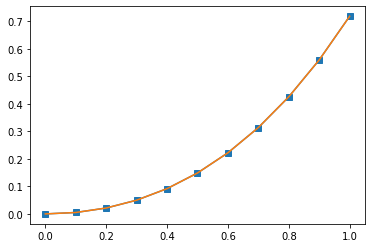

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X, Y, marker='s')
plt.plot(X, Ya)
plt.show()

In [ ]:
import inspect
def rungeKuttaAlgForSysOfODEs(problem):
  # naming this solver
  algName = inspect.stack()[0][3]

  # Reading the problem's data
  probName = problem['name']
  f = problem['f'] # [f1, f2, ...]
  x0 = problem['x0']
  xn = problem['xn']
  y0 = np.array(problem['y0'], copy = True) # [y10, y20, ...]
  #fa = problem['fa']
  h = problem['h']
  #yip1 = problem['yip1']

  # Variables Initialization
  i = 0
  x = x0 # 0
  y = y0 # [3, -2.5]
  print('i = ', i, ', x = %.2f' % x, ', y = ', y)

  # Variables Saving
  X = [x] # [0]
  Y = [[item] for item in y] # [[3], [-2.5]]

  n = int((xn - x0)/h)
  for i in range(1, n + 1): # i=1,2,...,5
    # Variables Updating
    k1 = h*f(x, y) # 0.2*f(0, [3, -2.5]) = 0.2*[-2.5, - 2*(-2.5) - 0.75*3] = [-0.5 ,  0.55]
    k2 = h*f(x + h/2., y + k1/2.)
    k3 = h*f(x + h/2., y + k2/2.)
    k4 = h*f(x + h, y + k3)
    y += (k1 + 2*k2 + 2*k3 + k4)/6.
    x += h
    print('i = ', i, ', x = %.2f' % x, ', y = ', y)

    # Variables Saving
    X += [x]
    for i in range(len(y)):
      Y[i].append(y[i]) # [[3, novo valor do y1], [-2.5, novo valor do y2]]

  print(algName, 'is done solving', probName)
  return X, Y # X = [...] e Y = [[...], [...]]

In [ ]:
import numpy as np
problem10 = {'name':'problem1',
            'f': lambda x, y: np.array([y[1], - 2*y[1] - 0.75*y[0]]), # vetor das declividades f1 e f2
            'x0': 0,
            'xn': 1,
            'y0': [3, -2.5], # vetor dos valores iniciais y10 e y20
            'h': 0.2}

In [ ]:
problem = problem10
X, Y = rungeKuttaAlgForSysOfODEs(problem)

i =  0 , x = 0.00 , y =  [ 3.  -2.5]
i =  1 , x = 0.20 , y =  [ 2.5505125  -2.01609375]
i =  2 , x = 0.40 , y =  [ 2.186302  -1.6419912]
i =  3 , x = 0.60 , y =  [ 1.88823825 -1.35072053]
i =  4 , x = 0.80 , y =  [ 1.64186614 -1.12215864]
i =  5 , x = 1.00 , y =  [ 1.43622106 -0.94126973]
rungeKuttaAlgForSysOfODEs is done solving problem1


In [ ]:
print(Y)

[[3.0, 2.5505125, 2.1863020042187498, 1.888238246711658, 1.6418661445146343, 1.4362210646017972], [-2.5, -2.01609375, -1.641991203515625, -1.3507205260651318, -1.1221586389369702, -0.9412697280559361]]


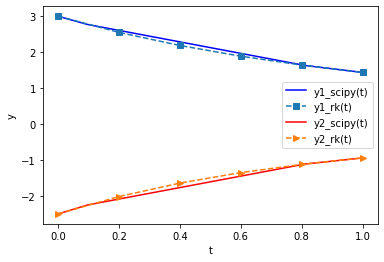

In [ ]:
# solving the same problem using scipy
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

sol = solve_ivp(fun = problem['f'],
                t_span = [problem['x0'], problem['xn']],
                y0 = problem['y0'])

# Plot the solution
plt.plot(sol.t, sol.y[0], 'b-', label='y1_scipy(t)')
plt.plot(X, Y[0], '--', label='y1_rk(t)', marker='s')

plt.plot(sol.t, sol.y[1], 'r-', label='y2_scipy(t)')
plt.plot(X, Y[1], '--', label='y2_rk(t)', marker='>')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
problem = {'y0': [1,2]}
print(problem)

{'y0': [1, 2]}


In [ ]:
def eulerExplicitoAlg():
  y = np.array(problem['y0'], copy = True)

  y += 1 # [1, 2] + 1 = [2, 3] = y mas também problem['y0'] = [2, 3]

eulerExplicitoAlg()

In [ ]:
print(problem)

{'y0': array([1, 2])}
